In [32]:
%matplotlib inline

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

from numpy.lib.stride_tricks import as_strided

def conv2d(a, b):
    a = as_strided(a,(len(a),a.shape[1]-len(b)+1,a.shape[2]-b.shape[1]+1,len(b),
                      b.shape[1],a.shape[3]),a.strides[:3]+a.strides[1:])
    return np.tensordot(a, b, axes=3)

def compose_tile(i,j,t,bands=[0,3]):
    coef = np.load(f"gcloud_data/{j:02d}_{i:02d}_coeffsnp.npy").reshape(24,7,-1)[:,bands,t:t+1]
    mean = np.load(f"gcloud_data/{j:02d}_{i:02d}_meanf32.npy").reshape(400,400)
    base = np.load(f"gcloud_data/{j:02d}_{i:02d}_basenp.npy")
    ker = np.load(f"gcloud_data/{j:02d}_{i:02d}_kernp.npy")

    res = np.einsum('ik,kj->ji', np.tanh(conv2d(base, ker)).reshape(-1,24), coef.reshape(24,-1)).reshape(-1,400,400)
    mean = mean + res
    return np.moveaxis(mean, 0, -1)

2018-01-30T00:02:41.000000000


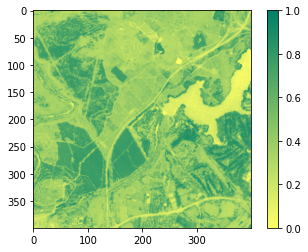

In [148]:
i,j = 6,9
t = 4
ds = xr.open_dataset(f"/data/pca_act/{26*j+i:03d}_2018.nc")/1e4
print(ds.time[t].values)
red = ds.nbart_red.isel(time=t).values
nir = ds.nbart_nir_1.isel(time=t).values
ndvi_true = (nir-red)/(nir+red)

plt.imshow(ndvi_true, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

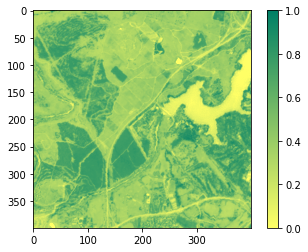

In [149]:
from datetime import datetime

t = datetime.utcfromtimestamp(ds.time[t].values.astype(int)*1e-9).timetuple().tm_yday
arr = compose_tile(i,j,t)
ndvi_rec = (arr[:,:,1]-arr[:,:,0])/(arr[:,:,1]+arr[:,:,0])

plt.imshow(ndvi_rec, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

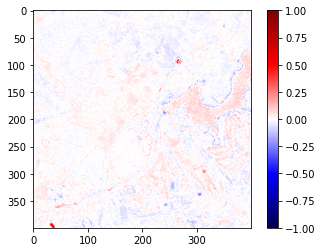

In [150]:
plt.imshow(ndvi_true-ndvi_rec, cmap='seismic',vmin=-1, vmax=1)
plt.colorbar()

2018-08-28T00:02:41.000000000


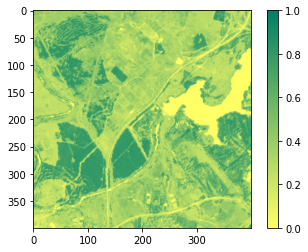

In [151]:
i,j = 6,9
t = 41
ds = xr.open_dataset(f"/data/pca_act/{26*j+i:03d}_2018.nc")
print(ds.time[t].values)
red = ds.nbart_red.isel(time=t).values
nir = ds.nbart_nir_1.isel(time=t).values
ndvi_true = (nir-red)/(nir+red)

plt.imshow(ndvi_true, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

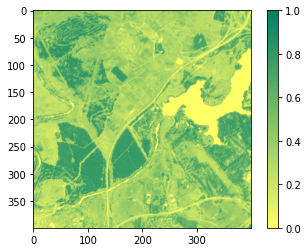

In [152]:
d = datetime.utcfromtimestamp(ds.time[t].values.astype(int)*1e-9)
t = (d.year - 2018)*365 + d.timetuple().tm_yday
arr = compose_tile(i,j,t)
ndvi_rec = (arr[:,:,1]-arr[:,:,0])/(arr[:,:,1]+arr[:,:,0])

plt.imshow(ndvi_rec, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

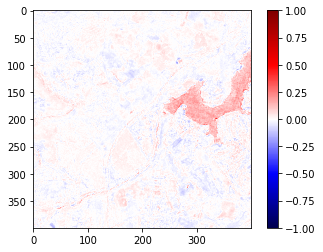

In [153]:
plt.imshow(ndvi_true-ndvi_rec, cmap='seismic',vmin=-1, vmax=1)
plt.colorbar()

2019-01-15T00:02:41.000000000


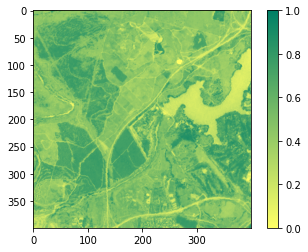

In [154]:
i,j = 6,9
t=2
ds = xr.open_dataset(f"/data/pca_act/{26*j+i:03d}_2019.nc")
print(ds.time[t].values)
red = ds.nbart_red.isel(time=t).values
nir = ds.nbart_nir_1.isel(time=t).values
ndvi_true = (nir-red)/(nir+red)

plt.imshow(ndvi_true, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

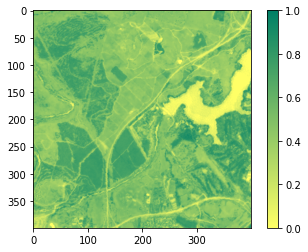

In [155]:
d = datetime.utcfromtimestamp(ds.time[t].values.astype(int)*1e-9)
t = (d.year - 2018)*365 + d.timetuple().tm_yday
arr = compose_tile(i,j,t)
ndvi_rec = (arr[:,:,1]-arr[:,:,0])/(arr[:,:,1]+arr[:,:,0])

plt.imshow(ndvi_rec, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

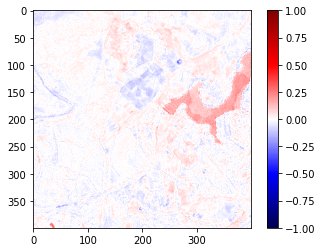

In [156]:
plt.imshow(ndvi_true-ndvi_rec, cmap='seismic',vmin=-1,vmax=1)
plt.colorbar()

2019-06-24T00:02:41.000000000
-0.51111114


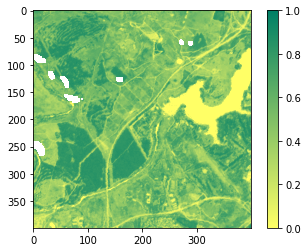

In [165]:
i,j = 6,9
t=34
ds = xr.open_dataset(f"/data/pca_act/{26*j+i:03d}_2019.nc")
print(ds.time[t].values)
red = ds.nbart_red.isel(time=t).values
nir = ds.nbart_nir_1.isel(time=t).values
ndvi_true = (nir-red)/(nir+red)

print(np.nanmin(ndvi_true))

plt.imshow(ndvi_true, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

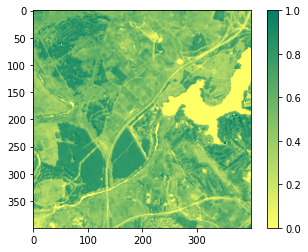

In [158]:
d = datetime.utcfromtimestamp(ds.time[t].values.astype(int)*1e-9)
t = (d.year - 2018)*365 + d.timetuple().tm_yday
arr = compose_tile(i,j,t)
ndvi_rec = (arr[:,:,1]-arr[:,:,0])/(arr[:,:,1]+arr[:,:,0])

plt.imshow(ndvi_rec, vmin=0, vmax=1, cmap="summer_r")
plt.colorbar()

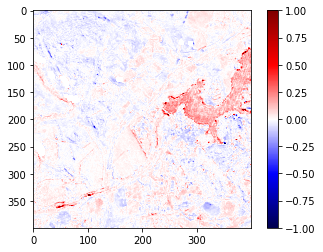

In [159]:
plt.imshow(ndvi_true-ndvi_rec, cmap='seismic',vmin=-1,vmax=1)
plt.colorbar()

In [168]:
datetime.strptime("2018-30-08T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%fZ")

ValueError: time data '2018-30-08T00:00:00.000Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'